In [6]:
%load_ext autoreload
%autoreload 2

import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from cytominer_eval import evaluate_metrics

from utils import remove_empty_wells

sys.path.append("..")
from plot_utils import plot_map_x3

from matplotlib import font_manager
font_path = '../../../open-sans/OpenSans-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams["font.family"] = ["Open Sans"]
plt.rcParams["font.size"] = 16

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
bio_map = pd.read_csv("outputs/corum-complex-retrieval-mAP-transformed-profiles-inf-eff_q_threshold.csv.gz")
bio_map

In [8]:
bio_map.rename({
    "mean_average_precision": "mAP",
    # "nlog10pvalue": "-log10(p-value)",
    "nlog10qvalue": "-log10(mAP p-value)",
    # "above_p_threshold": "p < 0.05",
    "above_q_threshold": "p < 0.05"
    }, axis=1, inplace=True)
bio_map

,Metadata_CORUM_protein_complex,mAP,nlog10pvalue,q_value,-log10(mAP p-value),above_p_threshold,p < 0.05
0,12S U11 snRNP,0.006434,0.733807,0.374370,0.426699,False,False
1,14-3-3q-SGK1-tau complex,0.171001,1.734744,0.070946,1.149075,True,False
2,17S U2 snRNP,0.007122,0.365090,0.651214,0.186276,False,False
3,18S U11/U12 snRNP,0.128453,1.750309,0.068959,1.161410,True,False
4,26S proteasome,0.026418,0.927850,0.275945,0.559177,False,False
...,...,...,...,...,...,...,...
1035,"prohibitin 2 complex, mitochondrial",0.000818,0.020774,0.971984,0.012341,False,False
1036,protein complex (DDX28; DHX30; GRSF1; FASTKD2;...,0.032021,1.274217,0.156248,0.806187,False,False
1037,sGNAI2-DRD2 receptor complex,0.004175,0.540458,0.502723,0.298671,False,False
1038,tRNA splicing endonuclease,0.001563,0.313522,0.668328,0.175010,False,False


/dgx1nas1/storage/data/akalinin/projects/grit-benchmark/1.calculate-metrics/orf/../plot_utils.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


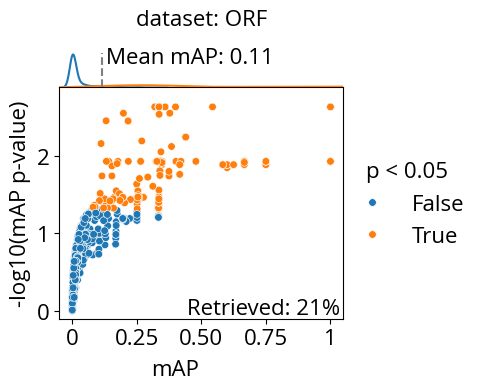

In [11]:
bio_map["const"] = "dataset: ORF"

plot_map_x3(bio_map, "const", "", s=30, pr_x=0.45, pr_y=0.02, l_x=1.1, l_y=0.58)

In [9]:
# df = bio_map

# def remove_inner_ticklabels(fig: plt.Figure):
#     """
#     Remove inner ticklabels from a figure.

#     Parameters
#     ----------
#     fig : matplotlib.figure.Figure
#         Figure to remove inner ticklabels from.
#     """
#     for ax in fig.axes:
#         try:
#             ax.label_outer()
#         except AttributeError:
#             pass


# fig, axes = plt.subplots(2, 1, figsize=(5, 6), gridspec_kw={'height_ratios': [5, 1]})

# mean_map = df['mAP'].mean()
# fr = df['q < 0.05'].mean()
# sns.scatterplot(
#     ax=axes[0], 
#     data=df, 
#     x='mAP', 
#     y='-log10(q-value)', 
#     hue='q < 0.05',
#     s=50
# )
# axes[0].set_title("Biological similarity (protein complexes)")
# axes[0].text(0.75, 0.3, f"FR: {fr:.2f}", transform=axes[0].transAxes)

# axes[0].set_xlabel("")
# axes[0].set_ylim(0, max(df['-log10(q-value)'])+0.1)
# sns.move_legend(axes[0], "lower right")

# # Second Row: KDE plots
# max_kde_y = 0
# mean_map = df['mAP'].mean()
# for p_value in df['q < 0.05'].unique():
#     ax = sns.kdeplot(
#         ax=axes[1],
#         data=df[df['q < 0.05'] == p_value],
#         x='mAP', 
#         label=str(p_value)
#     )
#     max_kde_y = max(max_kde_y, max(ax.lines[-1].get_ydata()))
#     axes[1].axvline(mean_map, color='grey', linestyle='--')
# # axes[1].set_ylabel("")
# axes[1].set_ylim(0, max_kde_y)
# axes[1].text(mean_map+0.01, 0.75, f"Mean mAP: {mean_map:.2f}", transform=axes[1].transAxes)

# for ax in axes.flat:
#     ax.set_xlim(0, 1)  # Set x-axis limit to 0-1 for all subplots

# remove_inner_ticklabels(fig)
# plt.tight_layout()
# plt.show()


In [5]:
# bio_map["q < 0.05"].sum()

215